## Library & Datasets Import

In [140]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import datetime
import time
import numpy as np

import networkx as nx
import community

In [141]:
import chardet

artists=pd.read_table("artists.dat")

user_artists=pd.read_table("user_artists.dat")
user_friends=pd.read_table("user_friends.dat")
user_taggedartists=pd.read_table("user_taggedartists.dat")
user_taggedartists_timestamps=pd.read_table("user_taggedartists-timestamps.dat")

with open('tags.dat', 'rb') as f:
    result = chardet.detect(f.read())
    
tags=pd.read_table("tags.dat",encoding=result['encoding'])

## Main figures of the datasets

#### Artists.dat

In [142]:
#Drop useless data
artists=artists.drop(['url','pictureURL'],axis=1)
artists=artists.rename(columns={'id': 'artistID','name':'artistname'})
artists.head(2)

,artistID,artistname
0,1,MALICE MIZER
1,2,Diary of Dreams


In [143]:
print("Total number of Artists on Last.fm : ",len(artists.artistname.unique()))

Total number of Artists on Last.fm :  17632


#### User_artists.dat

In [144]:
user_artists=user_artists.join(artists.set_index('artistID'), on='artistID')
user_artists.head(2)

,userID,artistID,weight,artistname
0,2,51,13883,Duran Duran
1,2,52,11690,Morcheeba


In [145]:
print("Number of bidirectional users - artists relationship :",len(user_artists))
print("Number of users in the dataset :",len(user_artists.userID.unique()))
print("Number of artists in the dataset :",len(user_artists.artistID.unique()))
print("Average user-artist weight :", user_artists.weight.mean())
print("Number of artists : ", len(user_artists.artistID.unique()))

Number of bidirectional users - artists relationship : 92834
Number of users in the dataset : 1892
Number of artists in the dataset : 17632
Average user-artist weight : 745.2439300256372
Number of artists :  17632


In [146]:
#Top Artists
top_artists=user_artists[['artistname','weight']].groupby(['artistname']).sum().reset_index()
top_artists=top_artists.sort_values(['weight'],ascending=False)
top_artists['percentage of total']=top_artists['weight']/top_artists['weight'].sum()
print("Top 10 Artists")
top_artists.head(10)

Top 10 Artists


,artistname,weight,percentage of total
2336,Britney Spears,2393140,0.034591
3998,Depeche Mode,1301308,0.018809
8352,Lady Gaga,1291387,0.018666
3023,Christina Aguilera,1058405,0.015298
11069,Paramore,963449,0.013926
9130,Madonna,921198,0.013315
12072,Rihanna,905423,0.013087
12818,Shakira,688529,0.009952
14109,The Beatles,662116,0.009570
7913,Katy Perry,532545,0.007698


In [147]:
top__artists=top_artists[['artistname']].head(50)
top50_artists=list(top__artists)


#### User_friends.dat

In [148]:
user_friends.head(2)

,userID,friendID
0,2,275
1,2,428


In [149]:
G=nx.from_pandas_dataframe(user_friends,'userID','friendID')
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 1892
Number of edges: 12717
Average degree:  13.4429


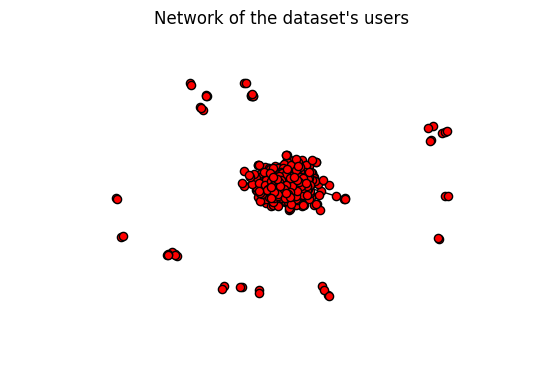

In [150]:
#Quick Visualisation
spring_pos=nx.spring_layout(G)
plt.axis("off")
nx.draw_networkx(G,pos=spring_pos,with_labels=False,node_size=35)
plt.title("Network of the dataset's users")
plt.show()

In [152]:
#Fraction of nodes and edges in the largest connected component "GCC" 
print ("Fraction of nodes in GCC: ", GCC.number_of_nodes() / G.number_of_nodes())
print ("Fraction of edges in GCC: ", GCC.number_of_edges() / G.number_of_edges())

Fraction of nodes in GCC:  0.9741014799154334
Fraction of edges in GCC:  0.9961468899897775


#### Tags.dat


In [153]:
tags.head(2)

,tagID,tagValue
0,1,metal
1,2,alternative metal


In [154]:
print("Number of musical tags :",len(tags.tagValue.unique()))

Number of musical tags : 11946


#### User_taggedartists.dat

In [155]:
user_taggedartists=pd.read_table("user_taggedartists.dat")

#We add some information
user_taggedartists=pd.merge(tags,user_taggedartists, left_on='tagID', right_on='tagID')
user_taggedartists=user_taggedartists.join(artists.set_index('artistID'), on='artistID')
user_taggedartists=user_taggedartists.sort_values(['year','month','day'],ascending=True)

#There are incoherent dates in the dataset, we remove them
user_taggedartists=user_taggedartists.loc[user_taggedartists['year']>=2005]
user_taggedartists.head(2)

,tagID,tagValue,userID,artistID,day,month,year,artistname
459,1,metal,595,188,1,8,2005,Opeth
460,1,metal,595,518,1,8,2005,Within Temptation


In [156]:
print("Number of tagged Artists : ", len(user_taggedartists.artistID.unique()))
print("Number of music tags used : ", len(user_taggedartists.tagID.unique()))
print("Number of tags : ",len(user_taggedartists))
print("Number of users : ", len(user_taggedartists.userID.unique()))
print("Average number of sounds per users : ", len(user_taggedartists)/len(user_taggedartists.userID.unique()))

Number of tagged Artists :  12523
Number of music tags used :  9748
Number of tags :  186474
Number of users :  1892
Average number of sounds per users :  98.55919661733616


In [157]:
years=user_taggedartists.year.unique()
nb_years=len(years)
for i in range (nb_years-1):
    
    x=user_taggedartists.loc[user_taggedartists['year']==years[i]]
    nb=len(x.tagID.unique())
    print("Number of music tags in year ",years[i]," : ",nb)

Number of music tags in year  2005  :  232
Number of music tags in year  2006  :  1004
Number of music tags in year  2007  :  1716
Number of music tags in year  2008  :  3232
Number of music tags in year  2009  :  3491
Number of music tags in year  2010  :  4150


We notice that the most recent the year, the more important the number of music tags used is.

## Study of Tags

In [158]:
#Top Tags among the dataset
top_tags=pd.DataFrame(user_taggedartists['tagValue'].value_counts())
top_tags['frequency']=top_tags['tagValue']/top_tags['tagValue'].sum()
print("Top 10 tags")
print(top_tags[:10])
#top_tags.head()

Top 10 tags
                  tagValue  frequency
rock                  7503   0.040236
pop                   5418   0.029055
alternative           5251   0.028159
electronic            4672   0.025054
indie                 4458   0.023907
female vocalists      4228   0.022673
80s                   2791   0.014967
dance                 2738   0.014683
alternative rock      2631   0.014109
classic rock          2287   0.012264


In [159]:
top_tags.head(11)

,tagValue,frequency
rock,7503,0.040236
pop,5418,0.029055
alternative,5251,0.028159
electronic,4672,0.025054
indie,4458,0.023907
female vocalists,4228,0.022673
80s,2791,0.014967
dance,2738,0.014683
alternative rock,2631,0.014109
classic rock,2287,0.012264


In [160]:
#Exemple of rare tags :
rare_tags=top_tags.loc[top_tags['tagValue']<=10]
rare_tags.tail()

,tagValue,frequency
incomparable,1,0.000005
80s rulez,1,0.000005
jamie t,1,0.000005
indie pop punk,1,0.000005
snow,1,0.000005


In [161]:
#Rare tags 
for i in range (10):
    no_tags=top_tags.loc[top_tags['tagValue']<=i]
    print("Tags used", i," times or less : " ,len(no_tags))

Tags used 0  times or less :  0
Tags used 1  times or less :  5372
Tags used 2  times or less :  6479
Tags used 3  times or less :  7084
Tags used 4  times or less :  7443
Tags used 5  times or less :  7674
Tags used 6  times or less :  7886
Tags used 7  times or less :  8045
Tags used 8  times or less :  8156
Tags used 9  times or less :  8255


In [162]:
#We exclude the tags used fewer than 10 times, as "UNDEFINED" tag
rare_tags=top_tags.loc[top_tags['tagValue']<=10]
rare_tags_list=rare_tags.index.unique()

def exclude_rare_tags(row):
    if row['tagValue'] in rare_tags_list:
        val="UNDEFINED"        
    else : 
        val=row['tagValue']    
    return val
    
user_taggedartists['tagValue']=user_taggedartists.apply(exclude_rare_tags,axis=1)

In [163]:
#We count how many times a given user listened to a given music tags over the entire period
def tag_listened(row):
    x=user_taggedartists.loc[user_taggedartists['userID']==row['userID']]
    val=len(x.tagValue.unique())
    return val

nb_tags_listened=user_taggedartists[['userID','tagValue']]
nb_tags_listened=nb_tags_listened.drop_duplicates()
nb_tags_listened['nb_tags']=nb_tags_listened.apply(tag_listened,axis=1)
nb_tags_listened.head(2)

,userID,tagValue,nb_tags
459,595,metal,8
1941,224,goth rock,45


In [164]:
#We compute how many users listen to only 1 music genre, 2 music genres,...
nb_tags_listened=nb_tags_listened[['userID','nb_tags']].drop_duplicates()
tags_breakdown=pd.DataFrame(nb_tags_listened['nb_tags'].value_counts())
compute=sum(tags_breakdown['nb_tags']*tags_breakdown.index)/tags_breakdown.sum()
print("An user listens in average to ",compute[0], " music tags")

An user listens in average to  14.2399577167  music tags


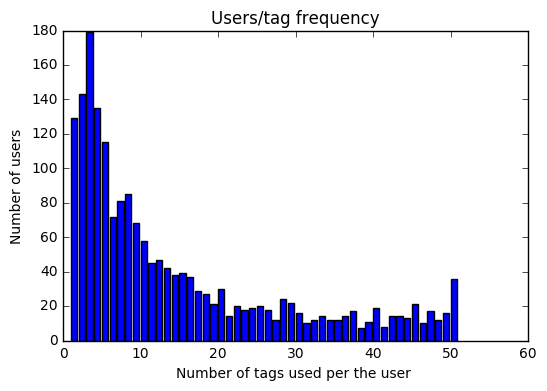

Here, about 180 users listen to 3 music tags exactly


In [165]:
x=tags_breakdown.index.values
y=tags_breakdown['nb_tags'].values
plt.bar(x,y)
plt.title("Users/tag frequency")
plt.xlabel("Number of tags used per the user ")
plt.ylabel("Number of users")
plt.show()

print("Here, about 180 users listen to 3 music tags exactly")

Then, we compute the weight each user gives to a given music tag. 

For instance, if a user listens to 50 "metal" songs, his/her music weight for "metal" would be 50

In [166]:
users_genre_weight1=user_taggedartists[['tagValue','userID']]
#users_genre_weight1=users_genre_weight1.head(10000)

def tag_weight(row):
    x=users_genre_weight1.loc[users_genre_weight1['userID']==row['userID']]
    x=x.loc[x['tagValue']==row['tagValue']]
    val=len(x)
    return val

users_genre_weight=users_genre_weight1.drop_duplicates().reset_index()
users_genre_weight['tagWeight']=users_genre_weight.apply(tag_weight,axis=1)
#users_genre_weight.drop(['index'])
users_genre_weight.head(3)

,index,tagValue,userID,tagWeight
0,459,metal,595,30
1,1941,goth rock,224,12
2,8164,new wave,1149,12


In [167]:
len(users_genre_weight.userID.unique())

1892

In [168]:
#We study only the top100 genres used, per frequency
top100_genre=list(top_tags.head(100).index)
print(top100_genre)

['rock', 'pop', 'alternative', 'electronic', 'indie', 'female vocalists', '80s', 'dance', 'alternative rock', 'classic rock', 'british', 'indie rock', 'singer-songwriter', 'hard rock', 'experimental', 'metal', 'ambient', '90s', 'new wave', 'seen live', 'chillout', 'hip-hop', 'punk', 'folk', 'electronica', 'rnb', 'instrumental', 'heavy metal', 'soul', 'acoustic', 'progressive rock', '70s', 'jazz', 'soundtrack', 'male vocalists', 'industrial', 'trip-hop', 'metalcore', 'rap', 'synthpop', 'american', 'hardcore', 'indie pop', 'pop rock', '00s', 'britpop', 'post-punk', '60s', 'punk rock', 'blues', 'psychedelic', 'downtempo', 'beautiful', 'sexy', 'thrash metal', 'idm', 'post-rock', 'electro', 'awesome', 'love', 'mellow', 'cover', 'death metal', 'female vocalist', 'post-hardcore', 'brazilian', 'amazing', 'pop punk', 'country', 'ebm', 'progressive metal', 'emo', 'hip hop', 'piano', 'screamo', 'trance', 'funk', 'classical', 'nu metal', 'favorites', 'melodic death metal', 'gothic', 'grunge', 'hou

In [169]:
users_genre_weight3=users_genre_weight.loc[users_genre_weight['tagValue'].isin(top100_genre)]
len(users_genre_weight3.userID.unique())

1632

We notice that a significant number of user do not listen to a top 50 genre, about 20% of them.

In [170]:
G2=nx.from_pandas_dataframe(users_genre_weight3,'userID','tagValue',['tagWeight'])
print(nx.info(G2))

Name: 
Type: Graph
Number of nodes: 1732
Number of edges: 15240
Average degree:  17.5982


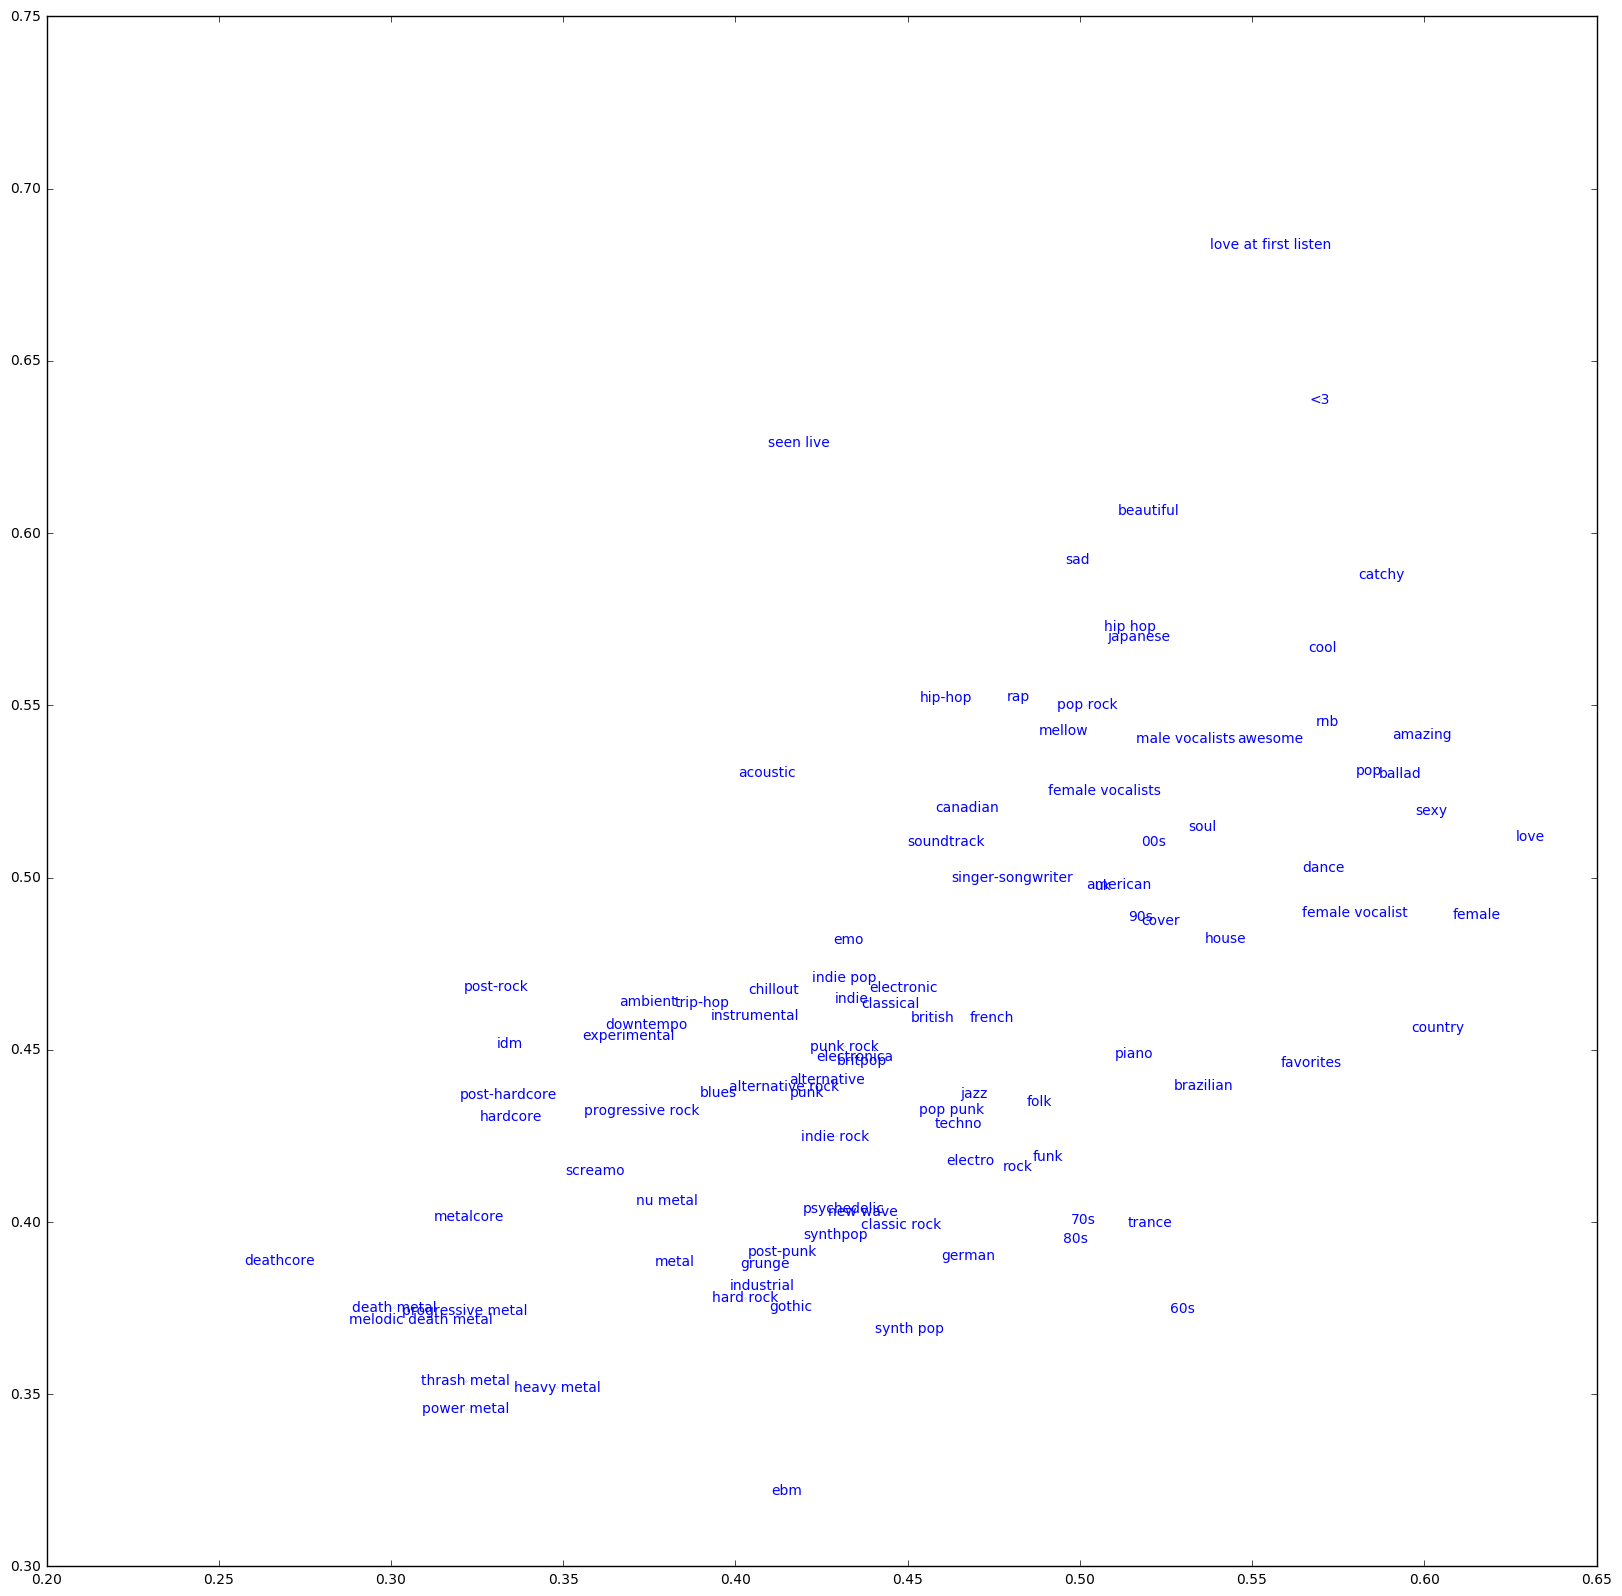

In [171]:
labels = {}
fontsize={}
plt.figure(figsize=(20,20))
pos=nx.spring_layout(G2)
for node in G2.nodes():
    if node in top100_genre:
        #set the node name as the key and the label as its value 
        labels[node] = node       
#set the argument 'with labels' to False so you have unlabeled graph
nx.draw_networkx_nodes(G2, pos,nodelist=top100_genre,with_labels=False,node_size=0.01)
#Now only add labels to the nodes you require (the hubs in my case)
nx.draw_networkx_labels(G2,pos,labels,font_size=10,font_color='b')
plt.show()

## Complimentary analysis - Artists Relationships (not finished)

In [172]:
#Top artists among the dataset
user_taggedartists_timestamps=pd.read_table("user_taggedartists-timestamps.dat")
top_artists=pd.DataFrame(user_taggedartists['artistname'].value_counts())
top_artists['frequency']=top_artists['artistname']/top_artists['artistname'].sum()
print("Top 10 artists")
print(top_artists[:10])


Top 10 artists
                    artistname  frequency
Britney Spears             931   0.005034
Lady Gaga                  767   0.004147
Christina Aguilera         762   0.004120
Madonna                    730   0.003947
Depeche Mode               701   0.003791
The Beatles                598   0.003234
Muse                       595   0.003217
Radiohead                  563   0.003044
Rihanna                    528   0.002855
Paramore                   467   0.002525


In [173]:
#We exclude the artists used fewer than 10 times, as "UNDEFINED" tag
rare_artists=top_artists.loc[top_artists['artistname']<=10]
rare_artists_list=top_artists.index.unique()

def exclude_rare_artists(row):
    if row['artistname'] in rare_tags_list:
        val="UNDEFINED"        
    else : 
        val=row['artistname']    
    return val
    
user_taggedartists['artistname']=user_taggedartists.apply(exclude_rare_artists,axis=1)

In [138]:
users_artist_weight1=user_taggedartists[['artistname','userID']]

def artist_weight(row):
    x=users_artist_weight1.loc[users_artist_weight1['userID']==row['userID']]
    x=x.loc[x['artistname']==row['artistname']]
    val=len(x)
    return val

users_artist_weight=users_artist_weight1.drop_duplicates().reset_index()
users_artist_weight['artistWeight']=users_artist_weight.apply(artist_weight,axis=1)
users_artist_weight.head(3)

,index,artistname,userID,artistWeight
0,459,metal,595,30
1,1941,goth rock,224,12
2,8164,new wave,1149,12


In [ ]:
#We study only the top100 genres used, per frequency
top100_artist=list(top_artists.head(100).index)
print(top100_artist)

In [ ]:
users_artist_weight3=users_artist_weight.loc[users_genre_weight['tagValue'].isin(top100_genre)]
len(users_genre_weight3.userID.unique())